In [1]:
using Plots, CSV, DataFrames, Pkg, Statistics, LaTeXStrings
include("src/canonical_two_stage_model_with_division_functions.jl")
include("src/model_with_ribosomes_functions.jl")

Main.ModelWithRibosomes

In [2]:
df = DataFrame(CSV.File("data/experimental_data_sanitised.csv"))

5028×7 DataFrame
  Row │ id                                
      │ String                            
──────┼─────────────────────────────────────────────────────
    1 │ IPI00229543.3;IPI00221463.3;IPI0…
    2 │ IPI00624840.2;IPI00623776.3;IPI0…
    3 │ IPI00110850.1;IPI00473320.2;IPI0…
    4 │ IPI00348270.3;IPI00124518.3
    5 │ IPI00282848.1;IPI00230730.4;IPI0…
    6 │ IPI00470152.2;IPI00755353.2;IPI0…
    7 │ IPI00307837.6;IPI00831365.1;IPI0…
    8 │ IPI00124096.1;IPI00918751.1
    9 │ IPI00229517.5
   10 │ IPI00223713.5
   11 │ IPI00468203.3;IPI00605518.1;IPI0…
  ⋮   │                 ⋮                  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮
 5019 │ IPI00875480.1;IPI00463549.3;IPI0…
 5020 │ IPI00849717.1
 5021 │ IPI00400214.3
 5022 │ IPI00378485.2
 5023 │ IPI00553465.4
 5024 │ IPI00123119.4;IPI00762213.1
 5025 │ IPI00918105.1;IPI00756882.2;IPI0…
 5026 │ IPI00469221.5;IPI00230018.1;IPI0…
 5027 │ IPI00828253.1;IPI00474450.1;IPI0…
 5028 │ IPI00315032.9;IPI00230024.3
                             6 columns and 5007 rows omitted

In [3]:
names(df)

7-element Vector{String}:
 "id"
 "pNumber"
 "mNumber"
 "alpha"
 "beta"
 "mHalfLife"
 "pHalfLife"

In [4]:
dropmissing!(df)

4247×7 DataFrame
  Row │ id                                
      │ String                            
──────┼─────────────────────────────────────────────────────
    1 │ IPI00110850.1;IPI00473320.2;IPI0…
    2 │ IPI00470152.2;IPI00755353.2;IPI0…
    3 │ IPI00307837.6;IPI00831365.1;IPI0…
    4 │ IPI00124096.1;IPI00918751.1
    5 │ IPI00229517.5
    6 │ IPI00223713.5
    7 │ IPI00468203.3;IPI00605518.1;IPI0…
    8 │ IPI00131459.1;IPI00649586.1;IPI0…
    9 │ IPI00890117.1;IPI00848816.1;IPI0…
   10 │ IPI00224740.6;IPI00650039.1
   11 │ IPI00117352.1
  ⋮   │                 ⋮                  ⋮  ⋮  ⋮  ⋮  ⋮  ⋮
 4238 │ IPI00896576.2;IPI00896688.1
 4239 │ IPI00111639.3
 4240 │ IPI00875480.1;IPI00463549.3;IPI0…
 4241 │ IPI00849717.1
 4242 │ IPI00400214.3
 4243 │ IPI00553465.4
 4244 │ IPI00123119.4;IPI00762213.1
 4245 │ IPI00918105.1;IPI00756882.2;IPI0…
 4246 │ IPI00469221.5;IPI00230018.1;IPI0…
 4247 │ IPI00315032.9;IPI00230024.3
                             6 columns and 4226 rows omitted

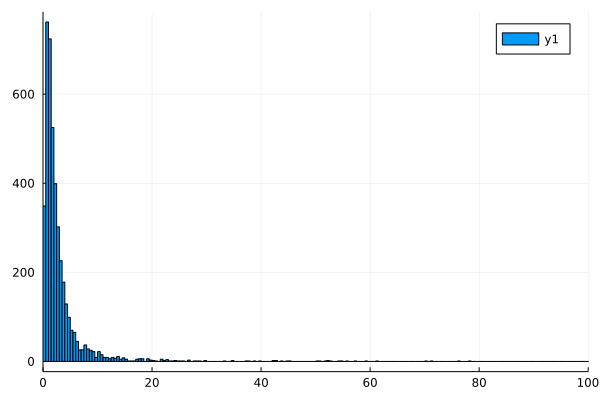

In [5]:
histogram(df[!, :alpha], xlims = (0, 100))

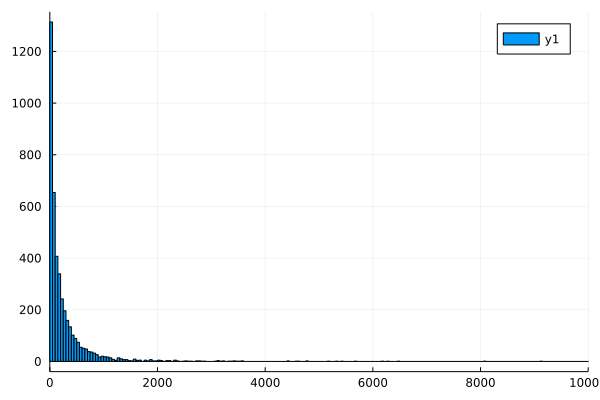

In [6]:
histogram(df[!, :beta], xlims=(0, 10000))

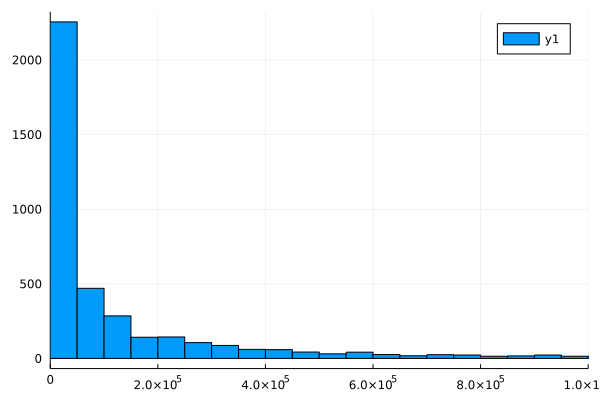

In [7]:
histogram(df[!, :pNumber], xlims=(0,1e6))

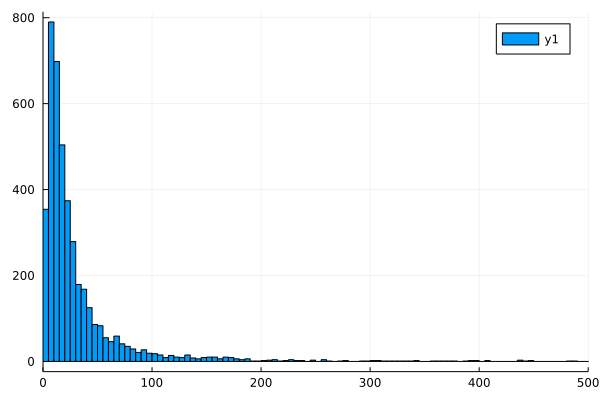

In [8]:
histogram(df[!, :mNumber], xlims=(0,500))

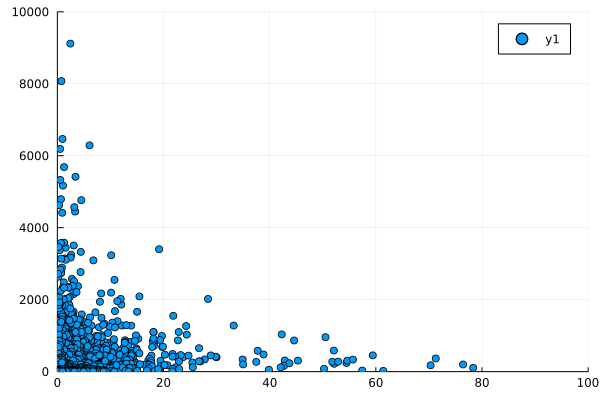

In [9]:
scatter(df[!, :alpha], df[!, :beta], ylims=(0, 10000), xlims = (0, 100))

In [10]:
histogram2d(df[!, :alpha], df[!, :beta], ylims=(0, 10000), xlims = (0, 100))

In [11]:
mean.(eachcol(select(df, Not(:id))))

6-element Vector{Float64}:
 475168.0025453261
     40.633651989639745
      3.428636684718625
    409.2224534965858
     10.704737461737698
     69.28024016953144

In [12]:
gamma = log(2)/10.7

0.06478011033270517

In [13]:
rho = LinRange(100, 5000.0, 100)

100-element LinRange{Float64}:
 100.0,149.495,198.99,248.485,297.98,347.475,…,4851.52,4901.01,4950.51,5000.0

In [14]:
datum = df[11, :]

DataFrameRow
 Row │ id             pNumber    mNumber  alpha    beta     mHalfLife  pHalfLi ⋯
     │ String         Float64    Float64  Float64  Float64  Float64    Float64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
  11 │ IPI00117352.1  2.80102e7   395.89    28.39  2019.85      13.73     136. ⋯
                                                                1 column omitted

28.39
2019.85
0.05048413551055683


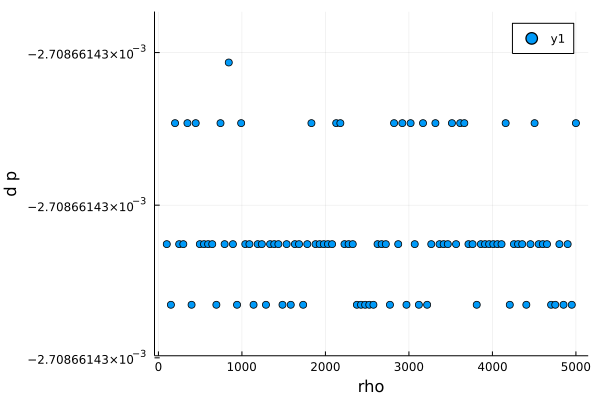

┌ Warning: No strict ticks found
└ @ PlotUtils /home/louis/.julia/packages/PlotUtils/es5pb/src/ticks.jl:283
┌ Warning: No strict ticks found
└ @ PlotUtils /home/louis/.julia/packages/PlotUtils/es5pb/src/ticks.jl:283
GKS: Possible loss of precision in routine SET_WINDOW


In [15]:
alpha = datum.alpha
beta2 = datum.beta
gamma = log(2)/datum.mHalfLife
println(alpha)
println(beta2)
println(gamma)
T = 27.5
y = []
for r in rho
    beta3 = 2*beta2/(3*r*T)
    p_2 = CanonicalTwoStageModel.p_time_av(alpha, beta2, gamma, T)
    p_3 = ModelWithRibosomes.p_time_av(alpha, beta3, gamma, r, T)
    append!(
        y,
        (p_3 - p_2) / p_2
    )
end
scatter(rho, y, ylabel="d p", xlabel="rho")

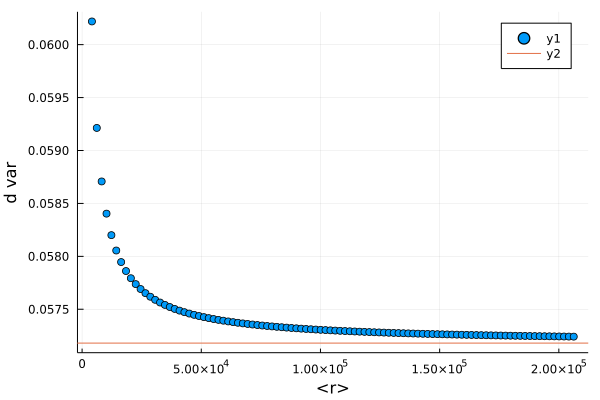

In [16]:
y = []
for r in rho
    beta3 = 2*beta2/(3*r*T)
    p_var_2 = CanonicalTwoStageModel.p_var_time_av(alpha, beta2, gamma, T)
    p_var_3 = ModelWithRibosomes.p_var_time_av(alpha, beta3, gamma, r, T)
    append!(
        y,
        (p_var_3 - p_var_2)/p_var_2
    )
end
scatter(rho*3/2 * T, y, ylabel="d var", xlabel="<r>")
hline!([ModelWithRibosomes.limit_of_differences(alpha, beta2, gamma, T)])

In [17]:
function relative_difference_in_variance(alpha, beta2, gamma, rho, T)
    beta3 = 2*beta2/(3*rho*T)
    p_var_2 = CanonicalTwoStageModel.p_var_time_av(alpha, beta2, gamma, T)
    p_var_3 = ModelWithRibosomes.p_var_time_av(alpha, beta3, gamma, rho, T)
    return abs((p_var_3 - p_var_2)/p_var_2)
end

relative_difference_in_variance (generic function with 1 method)

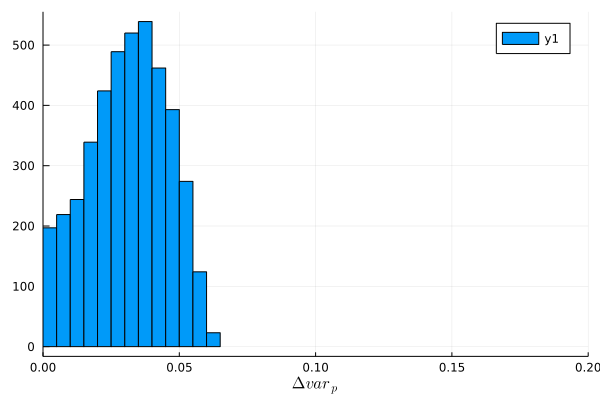

In [18]:
limits_of_difference = []
for x in eachrow(df)
    r = 5000
    gamma = log(2)/x.mHalfLife
    append!(limits_of_difference, relative_difference_in_variance(x.alpha, x.beta, gamma, r, T))
end
histogram(limits_of_difference, xlims=(0, 0.2), xlabel=L"\Delta \rm{var}_p")

In [19]:
function limit_of_difference(df, r)
    limits_of_difference = []
    for x in eachrow(df)
        gamma = log(2)/x.mHalfLife
        append!(limits_of_difference, relative_difference_in_variance(x.alpha, x.beta, gamma, r, T))
    end
    return limits_of_difference
end

limit_of_difference (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /home/louis/projects/translation-kinetics/VarianceDiffConvergence.gif
└ @ Plots /home/louis/.julia/packages/Plots/sUjwv/src/animation.jl:104


Plots.AnimatedGif("/home/louis/projects/translation-kinetics/VarianceDiffConvergence.gif")
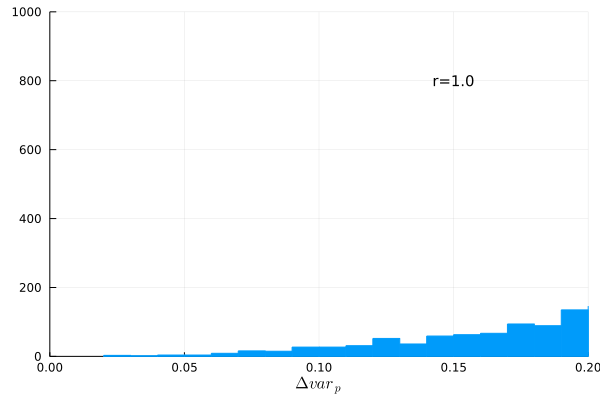

In [20]:
x = collect(1:0.1:30)
y = sin.(x)
dr = 0.5
 
anim = @animate for r = 1:dr:500
    histogram(
        limit_of_difference(df, r),
        legend=false,
        xlabel=L"\Delta \rm{var}_p",
        xlims=(0,0.2),
        ylims=(0, 1000),
        linecolour=:match
    )
    annotate!(0.15, 800, text("r=$r", 10))
end
 
gif(anim, "VarianceDiffConvergence.gif", fps = 30)